数字图像处理 第四次实验记录
# 直方图增强及频域图像处理技术

In [205]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import copy

plt.rcParams['font.sans-serif']=['SimHei']     #正常显示中文标签

def show_img(img, title=None):
    if title is not None:
        plt.title(title)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), cmap="gray", interpolation="bicubic")
    plt.xticks([])
    plt.yticks([])
    plt.show()

def show_imgs(img_and_title):
    plt.figure(dpi=150)
    sz = len(img_and_title)
    for i in range(0, sz):
        plt.subplot(1, sz, i+1)
        img = img_and_title[i][0]
        title = img_and_title[i][1]
        if title is not None:
            plt.title(title)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), cmap="gray", interpolation="bicubic")
        plt.xticks([])
        plt.yticks([])
    plt.show()

def show_grayimg(img, title=None):
    if title is not None:
        plt.title(title)
    plt.imshow(img, cmap="gray")
    plt.xticks([])
    plt.yticks([])
    plt.show()

def show_grayimgs(img_and_title):
    plt.figure(dpi=150)
    sz = len(img_and_title)
    for i in range(0, sz):
        plt.subplot(1, sz, i+1)
        img = img_and_title[i][0]
        title = img_and_title[i][1]
        if title is not None:
            plt.title(title)
        plt.imshow(img, cmap="gray")
        plt.xticks([])
        plt.yticks([])
    plt.show()

plt绘制直方图

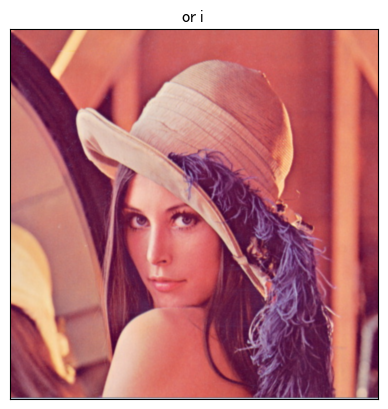

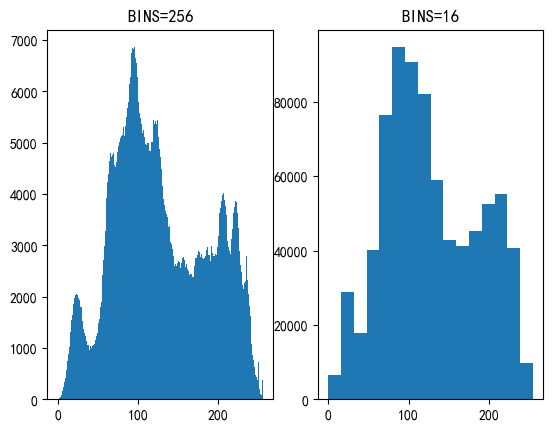

In [206]:
img = cv2.imread("lena.png")
show_img(img, "ori")
plt.subplot(1, 2, 1)
plt.title("BINS=256")
plt.hist(img.ravel(), 256)
plt.subplot(1, 2, 2)
plt.title("BINS=16")
plt.hist(img.ravel(), 16)
plt.show()

opencv绘制直方图

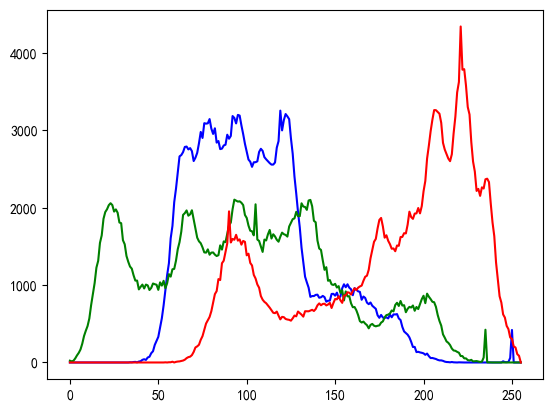

In [207]:
histb = cv2.calcHist([img], [0], None, [256], [0,255])
histg = cv2.calcHist([img], [1], None, [256], [0,255])
histr = cv2.calcHist([img], [2], None, [256], [0,255])
plt.plot(histb, color='b')
plt.plot(histg, color='g')
plt.plot(histr, color='r')
plt.show()

直方图均衡化

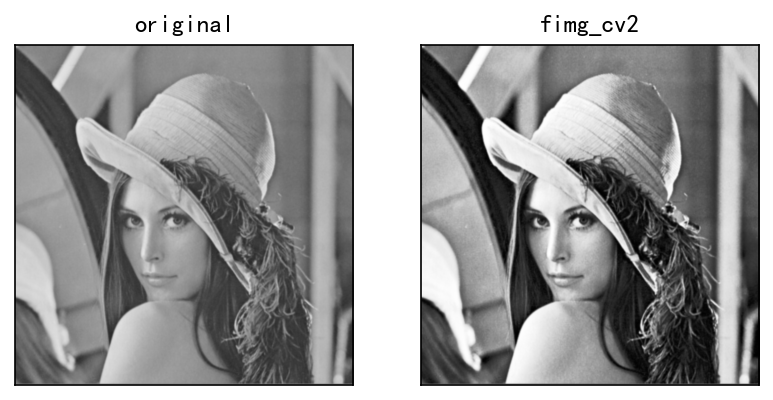

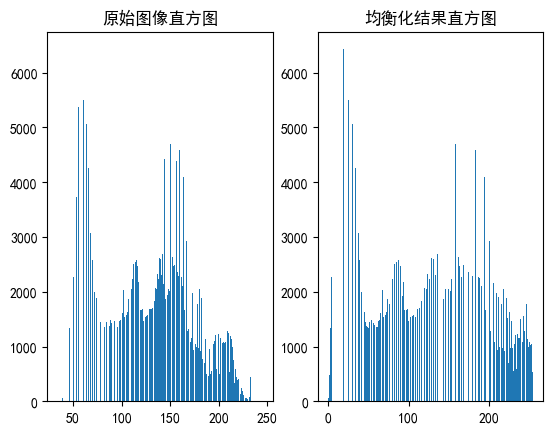

In [208]:
#-----------直方图均衡化处理---------------
img_gray = cv2.imread("lena.png", 0)
equ = cv2.equalizeHist(img_gray)
#-----------显示均衡化前后的图像---------------
show_imgs([[img_gray, "original"], [equ, "fimg_cv2"]])
#-----------显示均衡化前后的直方图---------------
plt.subplot(1, 2, 1)
plt.title("原始图像直方图")
plt.hist(img_gray.ravel(),256)
plt.subplot(1, 2, 2)
plt.title("均衡化结果直方图")
plt.hist(equ.ravel(),256)
plt.show()

Numpy 实现傅里叶变换

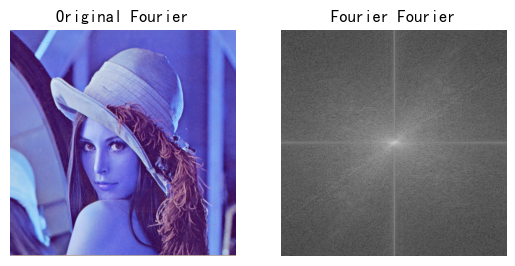

In [209]:
#快速傅里叶变换算法得到频率分布
f = np.fft.fft2(img_gray)
#默认结果中心点位置是在左上角,
#调用 fftshift()函数转移到中间位置
fshift = np.fft.fftshift(f)
#fft 结果是复数, 其绝对值结果是振幅
fimg_np = np.log(np.abs(fshift))
#展示结果
plt.subplot(121), plt.imshow(img, 'gray'), plt.title('Original Fourier')
plt.axis('off')
plt.subplot(122), plt.imshow(fimg_np, 'gray'), plt.title('Fourier Fourier')
plt.axis('off')
plt.show()

Numpy 实现傅里叶逆变换

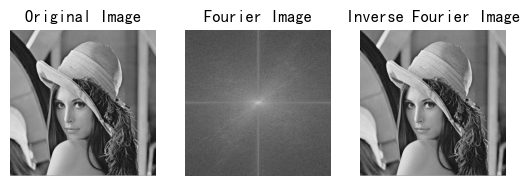

In [210]:
#傅里叶变换
f = np.fft.fft2(img_gray)
fshift = np.fft.fftshift(f)
ttt = np.log(np.abs(fshift))
#傅里叶逆变换
ishift = np.fft.ifftshift(fshift)
nfimg_np = np.fft.ifft2(ishift)
nfimg_np = np.abs(nfimg_np)
#展示结果
plt.subplot(131), plt.imshow(img_gray, 'gray'), plt.title('Original Image')
plt.axis('off')
plt.subplot(132), plt.imshow(ttt, 'gray'), plt.title('Fourier Image')
plt.axis('off')
plt.subplot(133),
plt.imshow(nfimg_np, 'gray'),
plt.title('Inverse Fourier Image')
plt.axis('off')
plt.show()

OpenCV 实现傅里叶变换

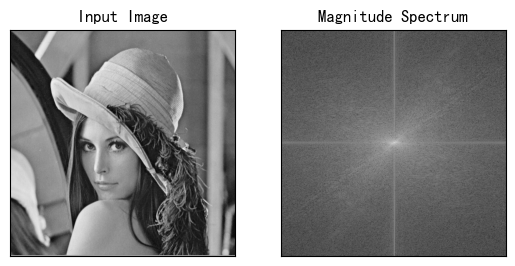

In [211]:
#傅里叶变换
dft = cv2.dft(np.float32(img_gray), flags = cv2.DFT_COMPLEX_OUTPUT)
#将频谱低频从左上角移动至中心位置
dft_shift = np.fft.fftshift(dft)
#频谱图像双通道复数转换为 0-255 区间
fimg_cv2 = 20*np.log(cv2.magnitude(dft_shift[:,:,0], dft_shift[:,:,1]))
#显示图像
plt.subplot(121), plt.imshow(img_gray, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(fimg_cv2, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

OpenCV 实现傅里叶逆变换

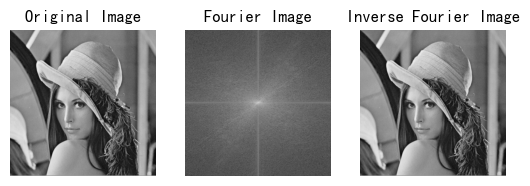

In [212]:
#傅里叶变换
dft = cv2.dft(np.float32(img_gray), flags = cv2.DFT_COMPLEX_OUTPUT)
dftshift = np.fft.fftshift(dft)
tt= 20*np.log(cv2.magnitude(dftshift[:,:,0], dftshift[:,:,1]))
#傅里叶逆变换
ishift = np.fft.ifftshift(dftshift)
ttt = cv2.idft(ishift)
nfimg_cv2 = cv2.magnitude(ttt[:,:,0], ttt[:,:,1])
#显示图像
plt.subplot(131), plt.imshow(img_gray, 'gray'), plt.title('Original Image')
plt.axis('off')
plt.subplot(132), plt.imshow(tt, 'gray'), plt.title('Fourier Image')
plt.axis('off')
plt.subplot(133),
plt.imshow(nfimg_cv2, 'gray'),
plt.title('Inverse Fourier Image')
plt.axis('off')
plt.show()

练习：运行并理解上述代码，比较对傅里叶逆变换后的图像与原图像进行比较，并与（2）Numpy 实现傅里叶逆变换的结果进行对比。

对比OpenCV和Numpy实现傅里叶逆变换的结果。

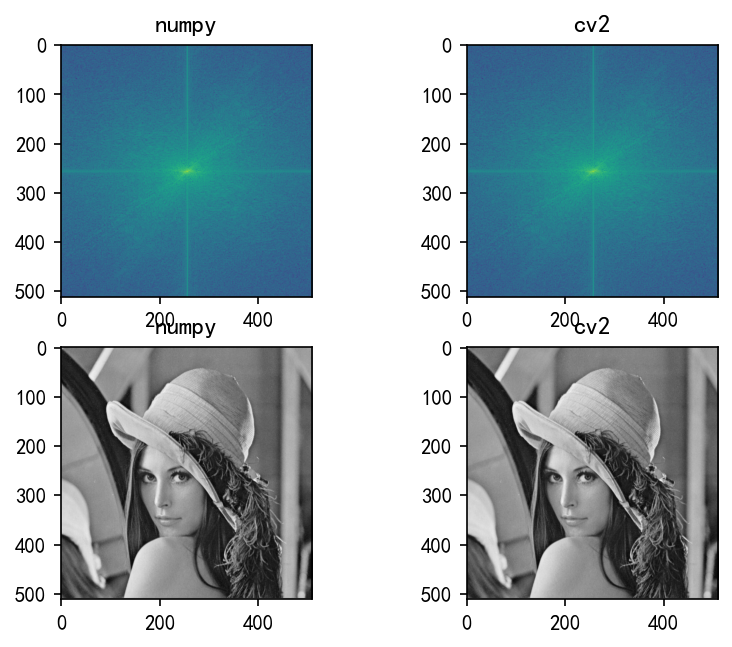

In [213]:
plt.figure(dpi=150)
plt.subplot(2, 2, 1)
plt.title("numpy")
plt.imshow(fimg_np)
plt.subplot(2, 2, 2)
plt.title("cv2")
plt.imshow(fimg_cv2)
plt.subplot(2, 2, 3)
plt.title("numpy")
plt.imshow(nfimg_np, 'gray')
plt.subplot(2, 2, 4)
plt.title("cv2")
plt.imshow(nfimg_cv2, 'gray')


理想低通滤波

(512, 510, 2) (512, 510, 2) (512, 510, 2)


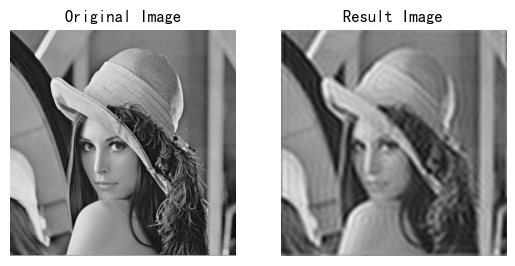

In [214]:
#傅里叶变换
dft = cv2.dft(np.float32(img_gray), flags = cv2.DFT_COMPLEX_OUTPUT)
fshift = np.fft.fftshift(dft)
#设置低通滤波器
rows, cols = img_gray.shape
crow,ccol = int(rows/2), int(cols/2) #中心位置
mask = np.zeros((rows, cols, 2), np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1
#掩膜图像和频谱图像乘积
f = fshift * mask
print (f.shape, fshift.shape, mask.shape)
#傅里叶逆变换
ishift = np.fft.ifftshift(f)
iimg = cv2.idft(ishift)
res = cv2.magnitude(iimg[:,:,0], iimg[:,:,1])
#显示原始图像和低通滤波处理图像
plt.subplot(121), plt.imshow(img_gray, 'gray'), plt.title('Original Image')
plt.axis('off')
plt.subplot(122), plt.imshow(res, 'gray'), plt.title('Result Image')
plt.axis('off')
plt.show()

练习：运行并理解上述程序。对结果与原图进行比较，观察是否存在“振铃现象”，并分析原因。

存在“振铃现象”，这是由于:理想低通滤波器的截止频率是非常陡峭的，这意味着频率响应从通过到阻断的过渡是瞬时的。这种突然的过渡在时域中表现为高频振荡，即振铃现象

理想高通滤波

练习：编写完整的高通滤波程序，并对滤波后的对象进行傅里叶逆变换。对结果与原图进行比较。高通滤波去掉 F(0,0)分量，整体亮度消失，尝试解决此问题。

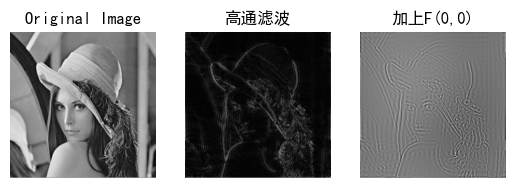

In [215]:
#傅里叶变换
dft = cv2.dft(np.float32(img_gray), flags = cv2.DFT_COMPLEX_OUTPUT)
fshift = np.fft.fftshift(dft)
# 高通
mask = np.zeros((rows, cols, 2), np.uint8)
mask.fill(1)
mask[crow-30:crow+30, ccol-30:ccol+30] = 0

mask2 = copy.copy(mask)

f = fshift * mask
mask2[crow-1:crow+1, ccol-1:ccol+1] = 1
f2 = fshift * mask2
#傅里叶逆变换
ishift = np.fft.ifftshift(f)
iimg = cv2.idft(ishift)
res = cv2.magnitude(iimg[:,:,0], iimg[:,:,1])

ishift2 = np.fft.ifftshift(f2)
iimg2 = cv2.idft(ishift2)
res2 = cv2.magnitude(iimg2[:,:,0], iimg2[:,:,1])

#显示原始图像和低通滤波处理图像
plt.subplot(131), plt.imshow(img_gray, 'gray'), plt.title('Original Image')
plt.axis('off')
plt.subplot(132), plt.imshow(res, 'gray'), plt.title('高通滤波')
plt.axis('off')
plt.subplot(133), plt.imshow(res2, 'gray'), plt.title('加上F(0,0)')
plt.axis('off')
plt.show()

（提高部分）编程练习作业：尝试设计巴特沃斯或高斯低通滤波器对下面的图像进行处理，比较不同参数下的结果，并与理想滤波器的结果进行比较。

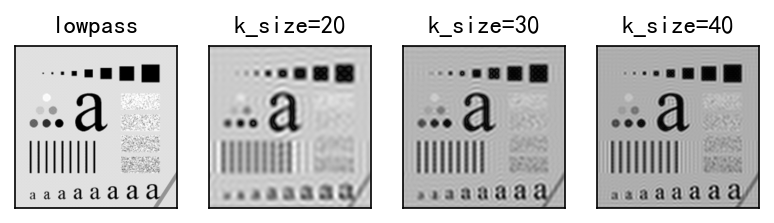

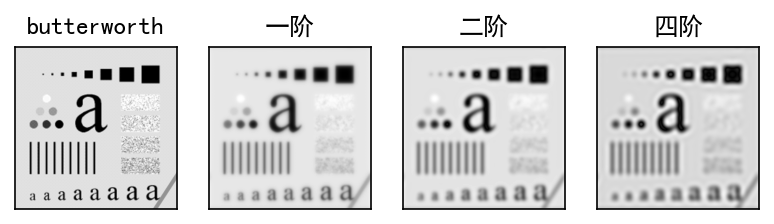

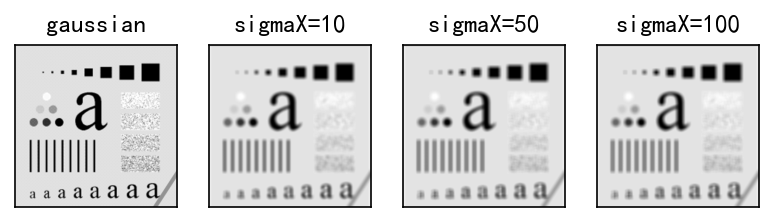

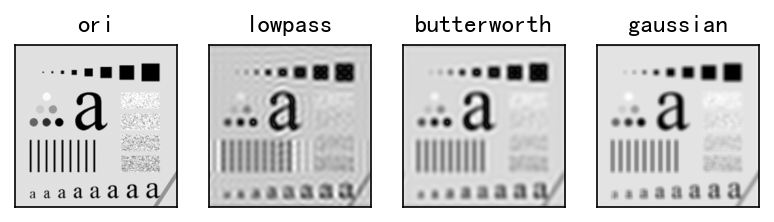

In [216]:
def filter_lowpass(img_gray, k_size):
    dft = cv2.dft(np.float32(img_gray), flags = cv2.DFT_COMPLEX_OUTPUT)
    fshift = np.fft.fftshift(dft)
    #设置低通滤波器
    rows, cols = img_gray.shape
    crow,ccol = int(rows/2), int(cols/2) #中心位置
    mask = np.zeros((rows, cols, 2), np.uint8)
    mask[crow-k_size:crow+k_size, ccol-k_size:ccol+k_size] = 1
    #掩膜图像和频谱图像乘积
    f = fshift * mask
    # print (f.shape, fshift.shape, mask.shape)
    #傅里叶逆变换
    ishift = np.fft.ifftshift(f)
    iimg = cv2.idft(ishift)
    res = cv2.magnitude(iimg[:,:,0], iimg[:,:,1])
    return res

def butterworth_lowpass_filter(img_gray, d0, n):
    """
    Apply a Butterworth low-pass filter to a grayscale image.

    :param img_gray: Input grayscale image
    :param d0: Cutoff frequency
    :param n: Order of the filter
    :return: Filtered image
    """
    # 获取图像尺寸
    rows, cols = img_gray.shape
    center_row, center_col = rows // 2, cols // 2

    # 创建巴特沃斯低通滤波器
    u, v = np.mgrid[0:rows, 0:cols]
    D = np.sqrt((u - center_row)**2 + (v - center_col)**2)
    H = 1 / (1 + (D / d0)**(2 * n))

    # 将图像转换到频域
    f = np.fft.fft2(img_gray)
    fshift = np.fft.fftshift(f)

    # 应用滤波器
    fshift_filtered = fshift * H

    # 将图像转换回空域
    f_ishift = np.fft.ifftshift(fshift_filtered)
    img_filtered = np.fft.ifft2(f_ishift)
    img_filtered = np.abs(img_filtered)

    return img_filtered

def gaussian_lowpass_filter(img_gray, kernel_size, sigmaX):
    """
    Apply a Gaussian low-pass filter to a grayscale image.

    :param img_gray: Input grayscale image
    :param kernel_size: Size of the Gaussian kernel (must be odd, e.g., 3, 5, 7)
    :param sigmaX: Standard deviation in X direction for the Gaussian kernel
    :return: Filtered image
    """
    img_filtered = cv2.GaussianBlur(img_gray, (kernel_size, kernel_size), sigmaX)
    return img_filtered

img_zuoye = cv2.imread("zuoye4.png", 0)

show_grayimgs([[img_zuoye, "lowpass"],
               [filter_lowpass(img_zuoye, 20), "k_size=20"],
               [filter_lowpass(img_zuoye, 30), "k_size=30"],
               [filter_lowpass(img_zuoye, 40), "k_size=40"],
               ])

show_grayimgs([[img_zuoye, "butterworth"],
               [butterworth_lowpass_filter(img_zuoye, 20, 1), "一阶"],
               [butterworth_lowpass_filter(img_zuoye, 20, 2), "二阶"],
               [butterworth_lowpass_filter(img_zuoye, 20, 4), "四阶"],
               ])

show_grayimgs([[img_zuoye, "gaussian"],
               [gaussian_lowpass_filter(img_zuoye, 21, 10), "sigmaX=10"],
               [gaussian_lowpass_filter(img_zuoye, 21, 50), "sigmaX=50"],
               [gaussian_lowpass_filter(img_zuoye, 21, 100), "sigmaX=100"]
               ])

show_grayimgs([[img_zuoye, "ori"],
               [filter_lowpass(img_zuoye, 20), "lowpass"],
               [butterworth_lowpass_filter(img_zuoye, 20, 4), "butterworth"],
               [gaussian_lowpass_filter(img_zuoye, 21, 100), "gaussian"]
               ])